# Trajectoire dans un champ de force centrale conservatif, épisode I

## Présentation du problème, prérequis physiques

Pour une particule de masse $m$ soumise uniquement à un champ de force centrale conservatif, la force s'écrit $F(r)\,\vec{e}_r$, c'est-à-dire qu'elle est radiale (la force est «centrale») et que la projection selon $\vec{e}_r$ ne dépend que de $r$ (le champ est «conservatif» dans le cas radial). Ainsi la relation fondamentale de la dynamique s'écrit
$$
m\,\vec{a} = F(r)\,\vec{e}_r
$$
ce qui donne en coordonnées polaires
$$
m\,\left((\ddot{r} - r\,\dot\theta^2)\,\vec{e}_r + (2\dot{r}\dot\theta + r\ddot\theta)\,\vec{e}_\theta\right) = F(r)\,\vec{e}_r
$$
La projection suivant $\vec{e}_r$ donne
$$
m(\ddot{r} - r\,\dot\theta^2) = F(r)
$$
alors que celle sur $\vec{e}_\theta$ donne
$$
2\dot{r}\dot\theta + r\ddot\theta = 0
\quad\Longleftrightarrow\quad
2r\dot{r}\dot\theta + r^2\ddot\theta=0
\quad\Longleftrightarrow\quad
\frac{\mathrm{d}}{\mathrm{d}t}\left(r^2\dot\theta\right) = 0
\quad\Longleftrightarrow\quad
r^2\dot\theta = C = \mathrm{C}^{\mathrm{te}}
= {r_0}^2{\dot\theta_0}
$$
On peut donc remplacer $\dot\theta = C / r^2$ dans la projection radiale pour obtenir une unique équation différentielle sur $r$ et un moyen de calculer $\dot\theta$ en tout point connaissant $r$ et donc de l'intégrer pour obtenir $\theta$. On a donc le système différentiel à trois équations différentielles d'ordre 1:
$$
\left\{
    \begin{array}{rcl}
        \dfrac{\mathrm{d}r}{\mathrm{d}t}   &=& \dot r \\
         \dfrac{\mathrm{d}\dot{r}}{\mathrm{d}t} &=&  \dfrac{F(r)}{m} + \dfrac{C^2}{r^3}  \\
        \dfrac{\mathrm{d}\theta}{\mathrm{d}t}&=&  \dfrac{C}{r^2}
    \end{array}
\right.
$$

## Application au cas képlerien

Dans le cas d'une masse $m$ en orbite autour d'une étoile de masse $M$, les équations précédentes s'écrivent
$$
\left\{
    \begin{array}{rcl}
        \dfrac{\mathrm{d}r}{\mathrm{d}t}   &=& \dot r \\
         \dfrac{\mathrm{d}\dot{r}}{\mathrm{d}t} &=&  -\dfrac{GM}{r^2} + \dfrac{C^2}{r^3}  \\
        \dfrac{\mathrm{d}\theta}{\mathrm{d}t}&=&  \dfrac{C}{r^2}
    \end{array}
\right.
$$
Cela ne dépend plus de la masse $m$ de la particule considérée. Si on se place dans le cadre d'une masse $M$ prise comme unité de masse (donc $M=1$ pour ce système), en imposant un système où $G=1$ et $r_0=1$, alors il est facile de connaître la vitesse de circularisation $v_{\text{circ}} = \sqrt{GM/r} = 1$ aussi. On peut donc facilement simuler trois orbites: l'une avec $v < v_{\text{circ}}$, la seconde avec $v = v_{\text{circ}}$ et la troisième avec $v > v_{\text{circ}}$. Dans les trois cas, on va partir de $\theta_0=0$ avec $r_0=1$ et $\dot{r}_0=0$, soit au périhélie ou à l'aphélie de la trajectoire (en imaginant que le point central est le Soleil).

Text(0.5, 1.0, 'Trajectoires pour différentes vitesses initiales')

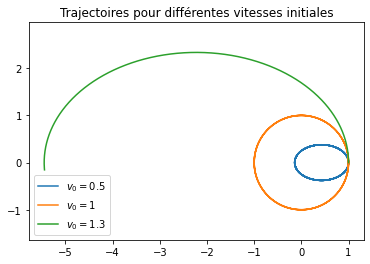

In [3]:
# Importation des bons modules
import numpy as np
import scipy as sp
import scipy.integrate 
import matplotlib.pyplot as plt

# Préparation du système d'équations différentielles
# On a besoin des valeurs globales
G = 1
M = 1
# Puis les équations différentielles
def kepler(y, t):
    r, rpoint, theta = y # Les trois variables, dans l'ordre voulu
    drdt = rpoint
    drpointdt = - G * M / r**2 + C**2 / r**3
    dthetadt = C / r**2
    return [drdt, drpointdt, dthetadt]

# Notez qu'à ce stade, C n'a pas encore été défini, mais ce n'est pas grave, 
# il ne faut juste pas oublier de le faire avant d'utiliser la fonction précédente
# NB: on ne peut le faire qu'une fois que l'on a choisi les conditions initiales

# Définition des vitesses initiales
V0 = [0.5, 1, 1.3] # Rappel, vcirc = 1 si r0=1
r0 = 1
theta0 = 0
# Les temps d'intégration: avec v0=1, Képler nous dit qu'on devrait avoir T = 2pi
# on va donc prendre 3 tours pour 1000 points d'intégration
temps = np.linspace(0, 6 * np.pi, 1000)

# On boucle sur les trois vitesses pour faire trois intégrations 
# et trois représentations graphiques
for v0 in V0:
    thetapoint0 = v0 / r0  # Cas où rpoint = 0
    C = r0**2 * thetapoint0
    y0 = [r0, 0, theta0]
    sol = sp.integrate.odeint(kepler, y0, temps)
    # on récupère les distances radiales et les angles
    r = sol[:, 0] # la distance radiale est le premier élément de chaque y
    theta = sol[:, 2] # L'angle theta est le 3e élément (donc en position 2)
    X = r * np.cos(theta) # Conversion en coordonnées cartésiennes
    Y = r * np.sin(theta)
    plt.plot(X, Y, label='$v_0={}$'.format(v0))
plt.legend()
plt.axis('equal')
plt.title('Trajectoires pour différentes vitesses initiales')
    

On voit que la trajectoire avec $v_0=1$ est bien circulaire quand on impose la même échelle horizontale et verticale (via `plt.axis('equal')`). On voit aussi qu'avec une faible vitesse initiale, on s'approche bien du point central alors que pour une vitesse proche de la vitesse de libération ($\sqrt2\approx1.4142$ dans ces unités), alors on ne fait même pas une période sur l'intervalle de temps regardé. 

## Ce qu'on vous demande de faire

On vous donne une série de vitesses initiales (dans la variable `V0`) ainsi qu'une série de positions initiales (variable `R0`). On supposera à chaque fois $\dot{r}_0=0$ et $\theta_0=0$.  Après intégration, il faut déterminer à la fois le demi grand axe $a$ (donné par $\frac{r_{max} + r_{min}}{2}$) et la période $T$ (temps pour que $\theta$ arrive une première fois à $2\pi$ puisqu'on commence à $\theta=0$). Pour toutes les conditions initiales où l'on peut effectivement déterminer une période, il s'agit de calculer la valeur moyenne de $T^2/a^3$ et stocker le résultat dans la variable `reponse`.

In [2]:
# Import des nouvelles données:
# * `G` pour la nouvelle valeur choisie pour G
# * `M` pour la nouvelle valeur choisie pour la masse centrale
# * `R0` pour une liste de positions initiales en r
# * `V0` pour une liste de vitesses initiales (orthoradiales) (de même taille que `R0`)
# * `temps` pour la liste des temps
from donnees import *


# À vous d'intégrer les équations du mouvement



# On stocke la valeur moyenne dans la variable `reponse`

reponse = 'valeur moyenne de T**2 / a**3'

print('Votre réponse:', reponse)
print('À comparer à :', 4 * np.pi**2 / (G * M))


Votre réponse: valeur moyenne de T**2 / a**3
À comparer à  39.47841760435743
